In [1]:
#importing libraries
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# import custom dependencies
import ADNI_utilities

In [18]:
# import dataframes
raw_df = pd.read_csv("../data/Per_Patient/patient_firstidx_merge.csv", low_memory=False)
merge_df = pd.read_csv("../data/ADNIMERGE.csv", low_memory=False)

In [19]:
drop_cols=["PTID","VISCODE","SITE","COLPROT","ORIGPROT","EXAMDATE","M","Month"]

In [20]:
by_vis = merge_df.groupby("VISCODE")
bl_df = by_vis.get_group("bl")

In [21]:
bl_df = bl_df.set_index("RID")
bl_df = bl_df.drop(columns=drop_cols, axis=1)
bl_df = bl_df.drop(columns=bl_df.columns[bl_df.dtypes==np.object],axis=1)

In [29]:
raw_df.replace({-1: np.nan}, inplace=True)
raw_df = raw_df.set_index("RID")

In [47]:
mdf = pd.concat((bl_df,raw_df), axis=1)

In [54]:
r=mdf.corr().values

In [84]:
rand_vals = np.random.rand(mdf.shape[0],mdf.shape[1])
rand_vals[mdf.isna()] = np.nan
rand_df = pd.DataFrame(rand_vals)
r_null = rand_df.corr().values

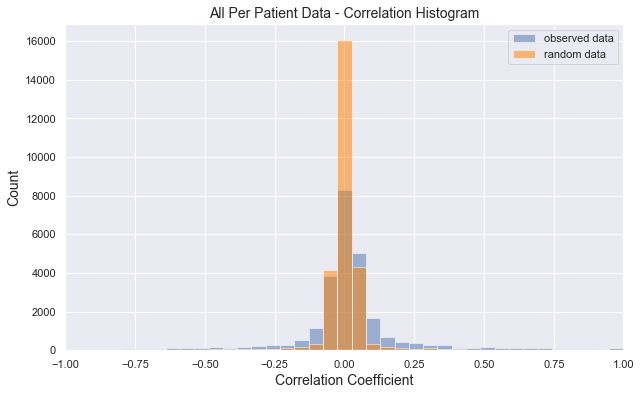

In [94]:
plt.figure(figsize=(10,6))
all_coef = np.empty([])
null_coef = np.empty([])
for i in range(r.shape[0]):
    for j in range(i):
        if i != j:
            all_coef = np.append(all_coef,r[i,j])
            null_coef = np.append(null_coef,r_null[i,j])
            
all_coef = all_coef[~np.isnan(all_coef)]
null_coef = null_coef[~np.isnan(null_coef)]
bins = np.linspace(-1,1,40)
plt.hist(all_coef, bins, color='b', alpha=0.5, label="observed data")
plt.hist(null_coef, bins, color=(1,.5,0), alpha=0.5, label="random data")
plt.xlabel("Correlation Coefficient", Fontsize=14)
plt.ylabel("Count", Fontsize=14)
plt.title("All Per Patient Data - Correlation Histogram", Fontsize=14)
plt.xlim([-1,1])
plt.legend();
plt.savefig("../figures/corrcoef_hist.svg")

In [69]:
[print(i) for i in range(1)]

0


[None]